# Rocket alarms Israel (20 May 2021 - 4 April 2024)

#### Data downloaded from: https://github.com/ElijahSum/israel_hamas_conflict_data 

In [74]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv(r"C:\Users\Tori\Downloads\archive (2)\air_alarms_bombardments.csv")

In [65]:
df.head()

,Unnamed: 0,alarm_date,alarm_time,region,place,attack_number
0,0,2021-05-20,18:00:37,Gaza Envelope,Mefalsim,1
1,1,2021-05-20,18:00:37,Gaza Envelope,Nir Am Shooting Range,1
2,2,2021-05-20,18:00:37,Gaza Envelope,Sderot,1
3,3,2021-05-20,18:00:37,Gaza Envelope,Ibim,1
4,4,2021-05-20,18:00:37,Gaza Envelope,Nir Am,1


In [4]:
df.isnull().sum()

Unnamed: 0       0
alarm_date       0
alarm_time       0
region           0
place            0
attack_number    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(16271, 6)

In [7]:
df.value_counts('alarm_date').head(10)

alarm_date
2023-10-07    4351
2023-10-11    1044
2022-08-07     454
2023-10-09     356
2023-05-10     318
2022-08-06     307
2023-05-13     266
2023-10-10     257
2023-10-17     252
2023-10-13     230
dtype: int64

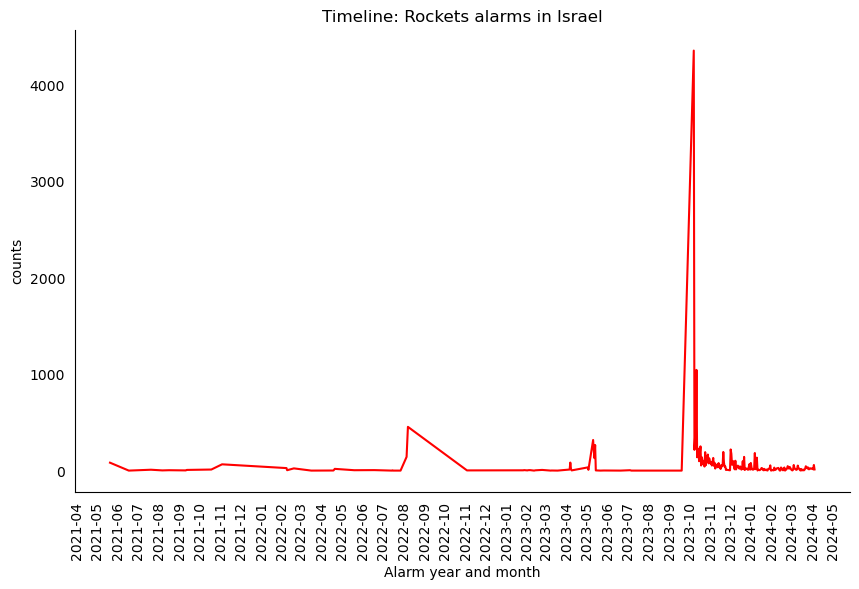

In [46]:
import matplotlib.dates as mdates

df['alarm_date'] = pd.to_datetime(df['alarm_date'])


data_viz_dates = df.groupby(['alarm_date']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_viz_dates, x='alarm_date', y='counts', color = 'red')

# Format the x-axis to show only one tick per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Timeline: Rockets alarms in Israel')
plt.xlabel('Alarm year and month')

plt.xticks(rotation=90)


plt.show()


In [9]:
print(min(df['alarm_date']))
print(max(df['alarm_date']))

2021-05-20 00:00:00
2024-04-04 00:00:00


In [10]:
df['alarm_time'] = pd.to_datetime(df['alarm_time'])

df['alarm_time'] = df['alarm_time'] - pd.to_timedelta(df['alarm_time'].dt.second, unit='s')
df['alarm_time'] = df['alarm_time'].dt.time

# Combine 'alarm_date' and 'alarm_time' into a single datetime column
df['alarm_datetime'] = pd.to_datetime(df['alarm_date'].astype(str) + ' ' + df['alarm_time'].astype(str))

top_alarm_datetimes = df['alarm_datetime'].value_counts().head(10).reset_index()

top_alarm_datetimes.columns = ['alarm_datetime', 'counts']

print(top_alarm_datetimes)


       alarm_datetime  counts
0 2023-10-11 15:35:00     431
1 2023-10-11 15:21:00     211
2 2023-11-20 16:03:00     138
3 2023-10-07 17:00:00     102
4 2023-10-11 15:20:00      87
5 2023-10-24 14:01:00      85
6 2023-10-07 03:31:00      85
7 2023-10-07 03:33:00      79
8 2024-01-06 06:07:00      77
9 2023-10-07 04:33:00      75


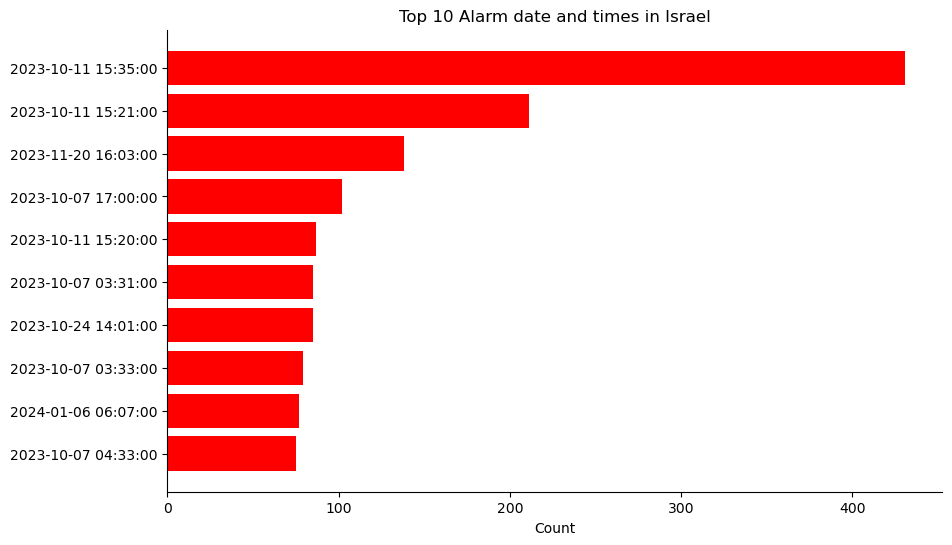

In [11]:
top_alarm_datetimes = top_alarm_datetimes.sort_values(ascending = True, by = 'counts')
# Visualize the top 10 alarm datetimes
plt.figure(figsize=(10, 6))
ax = plt.barh(top_alarm_datetimes['alarm_datetime'].astype(str), top_alarm_datetimes['counts'], color = 'red')
plt.xlabel('count')
#plt.ylabel('Counts')
plt.title('Top 10 Alarm date and times in Israel')
plt.xlabel('Count')

# Hide the top and right spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [12]:
# Extract the hour component

df['alarm_hour'] = df['alarm_time'].apply(lambda x: x.replace(minute=0, second=0))


print(df[['alarm_time', 'alarm_hour']])

      alarm_time alarm_hour
0       18:00:00   18:00:00
1       18:00:00   18:00:00
2       18:00:00   18:00:00
3       18:00:00   18:00:00
4       18:00:00   18:00:00
...          ...        ...
16266   17:43:00   17:00:00
16267   17:43:00   17:00:00
16268   17:43:00   17:00:00
16269   17:43:00   17:00:00
16270   17:43:00   17:00:00

[16271 rows x 2 columns]


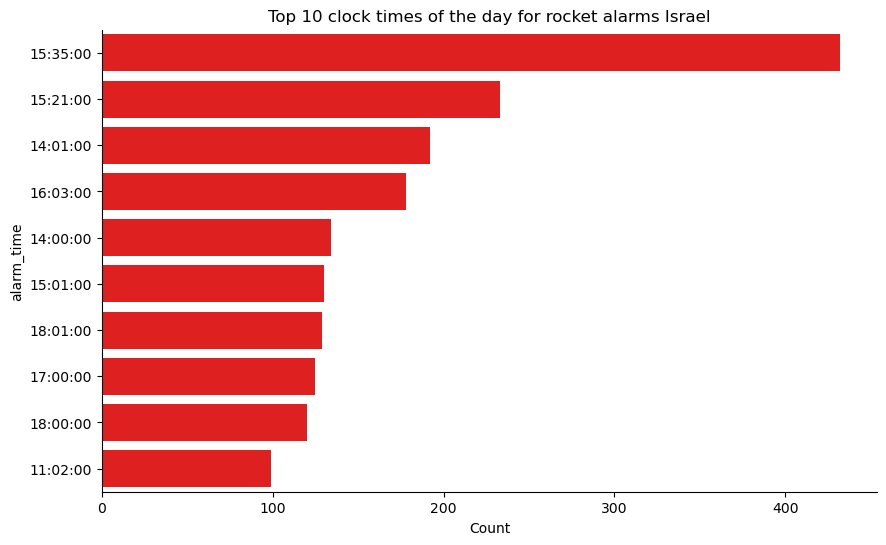

In [13]:
time_top = df.value_counts('alarm_time').head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=time_top.values, y=time_top.index, color = 'red')
plt.title('Top 10 clock times of the day for rocket alarms Israel')
plt.xlabel('Count')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

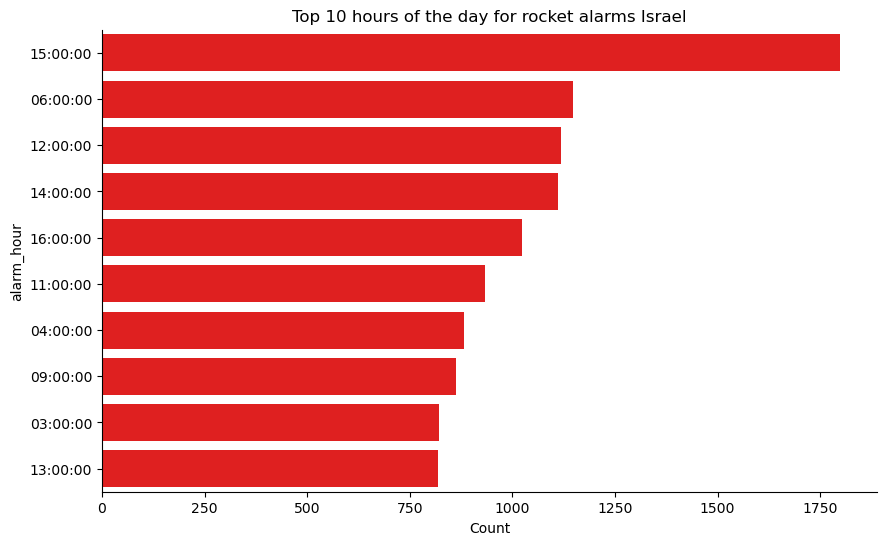

In [14]:
hour_top = df.value_counts('alarm_hour').head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=hour_top.values, y=hour_top.index, color = 'red')
plt.title('Top 10 hours of the day for rocket alarms Israel')
plt.xlabel('Count')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [15]:
df['region'] = df['region'].replace({'Dan': 'Tel-Aviv Area'})
df.value_counts('region')

region
Gaza Envelope         4804
Confrontation Line    2379
Lakhish               2000
Western Lakhish       1300
Shfela (Lowlands)     1286
Tel-Aviv Area         1264
Western Negev          656
Upper Galilee          506
Central Negev          326
Shfelat Yehuda         306
Southern Golan         180
HaAmakim               176
Southern Negev         147
Yarkon                 139
Northern Golan         136
Jerusalem              114
Sharon                 105
Judea                  101
Lower Galilee           85
Beit Sha'an Valley      61
Wadi Ara                49
HaMifratz               34
Eilat                   32
Samaria                 27
Bika'a                  25
Arabah                  11
Menashe                 10
Center Galilee           8
HaCarmel                 4
dtype: int64

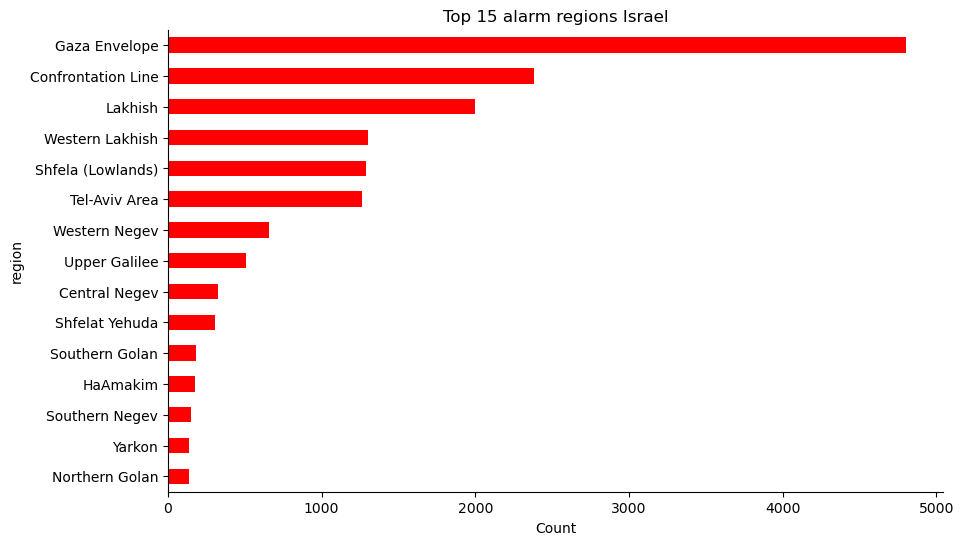

In [35]:
top_regions = df.value_counts('region').head(15)
top_regions = top_regions.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
ax = top_regions.plot(kind='barh', color = 'red')
plt.title('Top 15 alarm regions Israel')
plt.xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

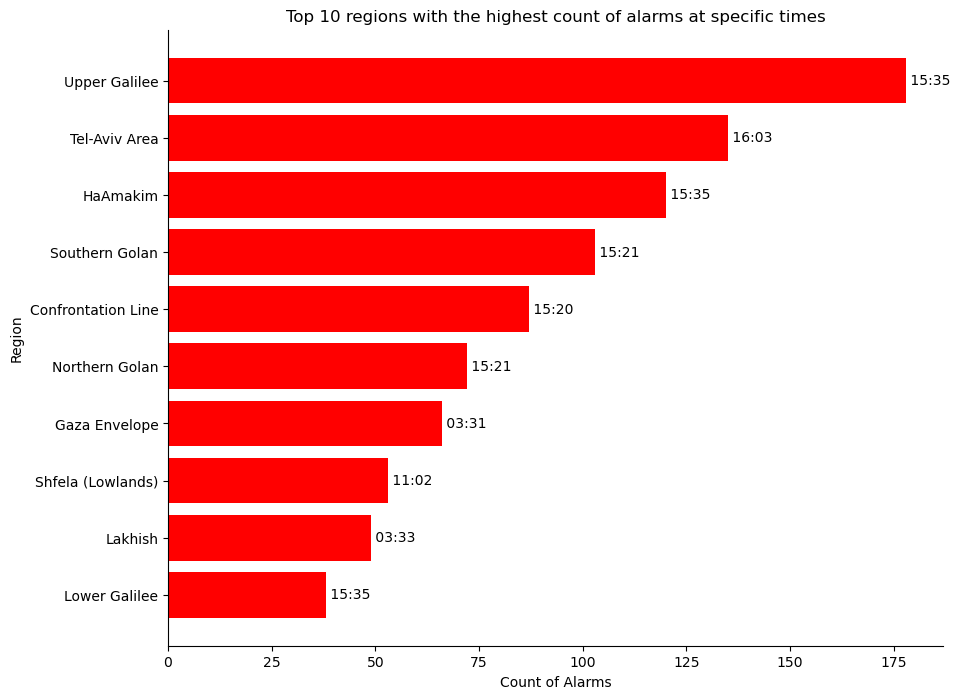

In [49]:



# Ensure 'alarm_date' and 'alarm_time' are in datetime format
df['alarm_date'] = pd.to_datetime(df['alarm_date'])
df['alarm_time'] = pd.to_datetime(df['alarm_time'], format='%H:%M:%S').dt.time

# Combine 'alarm_date' and 'alarm_time' into a single datetime column
df['alarm_datetime'] = df.apply(lambda row: pd.to_datetime(f"{row['alarm_date'].date()} {row['alarm_time']}"), axis=1)

# Extract the hour and minute component from the combined datetime column
df['alarm_time_m'] = df['alarm_datetime'].dt.floor('T')

# Group by 'region' and 'alarm_time_m' and count occurrences
grouped_df = df.groupby(['region', 'alarm_time_m']).size().reset_index(name='counts')

# Find the top minute for each region
top_minutes = grouped_df.loc[grouped_df.groupby('region')['counts'].idxmax()]

# Select the top 10 regions based on total alarm counts
top_regions = top_minutes.groupby('region')['counts'].sum().nlargest(10).index
top_minutes = top_minutes[top_minutes['region'].isin(top_regions)]

# Sort the DataFrame by 'counts' in descending order
top_minutes = top_minutes.sort_values(by='counts', ascending=True)

# Plot the results
plt.figure(figsize=(10, 8))
bars = plt.barh(top_minutes['region'], top_minutes['counts'], color='red')

# Annotate the bars with the top hours and minutes
for bar, minute in zip(bars, top_minutes['alarm_time_m'].dt.strftime('%H:%M')):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {minute}', va='center')

plt.xlabel('Count of Alarms')
plt.ylabel('Region')
plt.title('Top 10 regions with the highest count of alarms at specific times')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


In [ ]:
top_places = df.value_counts('place').head(15)
top_places = top_places.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
ax = top_places.plot(kind='barh', color = 'red')
plt.title('Top 15 places Israel')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

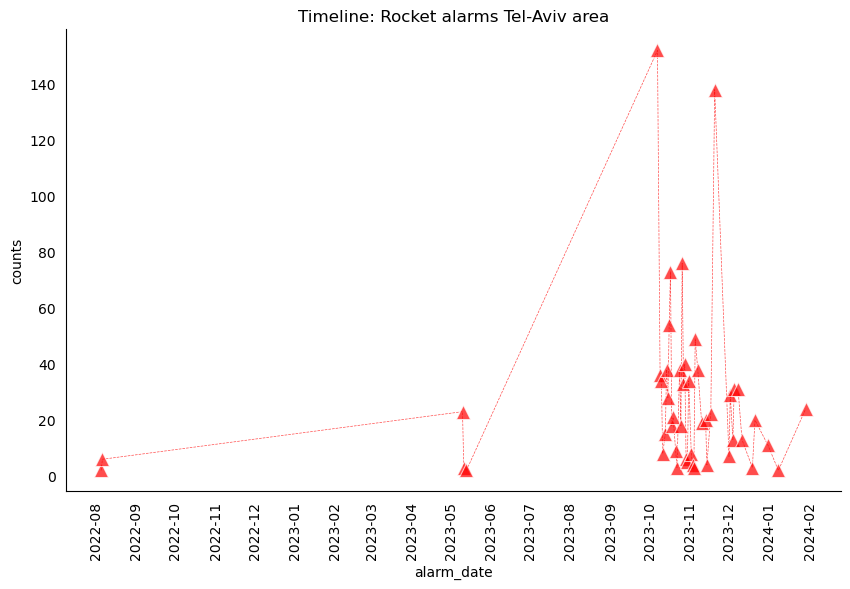

In [48]:
data_viz_dates_tel_aviv_area = df.groupby(['alarm_date', 'region']).size().reset_index(name='counts')
data_viz_dates_tel_aviv_area = data_viz_dates_tel_aviv_area[data_viz_dates_tel_aviv_area['region'] == 'Tel-Aviv Area']


plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_viz_dates_tel_aviv_area, x='alarm_date', y='counts', lw = 0.5 ,color = 'red', marker = '^', linestyle= '--', markersize = 10, alpha = 0.7)

# Format the x-axis to show only one tick per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)


plt.xticks(rotation=90)
plt.title('Timeline: Rocket alarms Tel-Aviv area')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


In [19]:
tel_aviv_count = df['region'] == 'Tel-Aviv Area'
tel_aviv_count = df.loc[tel_aviv_count]
tel_aviv_count.value_counts('place').head(15)

place
Holon                           65
Bat Yam                         48
Rishon LeZion - West            47
Azor                            45
Tel Aviv - South and Jaffa      42
Ramat Gan - West                41
Tel Aviv - East                 37
Tel Aviv - City Center          35
Or Yehuda                       35
Mikveh Israel                   34
Hemed                           31
Mishmar HaShiva                 30
Givatayim                       29
Ganot                           28
Tel Aviv - Across the Yarkon    28
dtype: int64

In [20]:
tel_aviv_area_time = tel_aviv_count['alarm_time']
tel_aviv_area_time_top= tel_aviv_area_time.value_counts().head(10)

In [21]:
tel_aviv_area_hour = tel_aviv_count['alarm_hour']
tel_aviv_area_hour_top= tel_aviv_area_hour.value_counts().head(10)

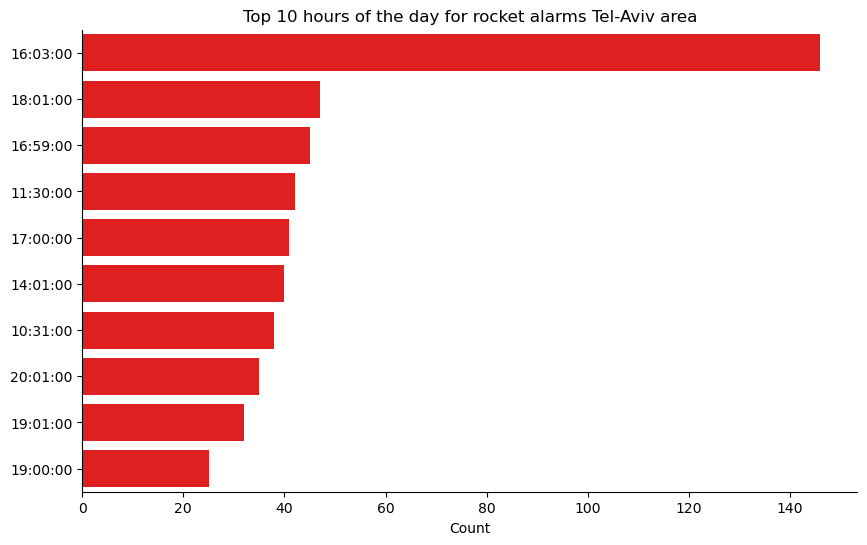

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tel_aviv_area_time_top.values, y=tel_aviv_area_time_top.index, color = 'red')
plt.title('Top 10 hours of the day for rocket alarms Tel-Aviv area')
plt.xlabel('Count')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()